# Exploratory Analysis of the sample data from Nick

We start with some standard imports and settings.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from importlib import reload # Useful for reloading a library after you've made changes to it

In [92]:
# generic paths.
from pathlib import Path
ROOT = Path.cwd().parent
DATA = ROOT / "data"

import sys
if str(ROOT.absolute()) not in sys.path:
    sys.path.append(str(ROOT.absolute()))

In [93]:
# Some additional style settings for matplotlib
matplotlib.style.use("ggplot")
matplotlib.rcParams.update({'figure.figsize':(14,8)})

In [94]:
DATA_SAMPLE = DATA / "01_data_sample"
LETSGROW = DATA_SAMPLE / "Examples Dataset LetsGrow"

In [95]:
# our libraries.
if "bluedragonfly.plotting" in sys.modules:
    reload(bluedragonfly.plotting)
else:
    import bluedragonfly.plotting

## Let's grow datasets

In [96]:
df = pd.DataFrame()

for datafile in LETSGROW.iterdir():
    # print(datafile)
    df = pd.concat([df,pd.read_excel(datafile, index_col='local time', parse_dates=True)], axis=1)

# a little renaming to keep the columns names short :)
f = lambda x : '-'.join(x.split('-')[:2]).strip()
df.columns = map(f, df.columns.values)

#df = df.resample('5min').mean()

df.head()

desired temperature RTR plus 1/2 - °C  \
local time                                                   
2017-12-31 00:00:00                                    NaN   
2017-12-31 00:05:00                                    NaN   
2017-12-31 00:10:00                                    NaN   
2017-12-31 00:15:00                                    NaN   
2017-12-31 00:20:00                                    NaN   

                     CO2 greenhouse - ppm  \
local time                                  
2017-12-31 00:00:00                615.78   
2017-12-31 00:05:00                627.48   
2017-12-31 00:10:00                624.17   
2017-12-31 00:15:00                623.83   
2017-12-31 00:20:00                630.00   

                     absolute humidity content outside air - g/m³  \
local time                                                          
2017-12-31 00:00:00                                           NaN   
2017-12-31 00:05:00                                           NaN   
2017-12-31 00:10:00                                           NaN   
2017-12-31 00:15:00                                           NaN   
2017-12-31 00:20:00                                           NaN   

                     substrate weight - kg  water content substrate - %  
local time                                                               
2017-12-31 00:00:00                    NaN                          NaN  
2017-12-31 00:05:00                    NaN                          NaN  
2017-12-31 00:10:00                    NaN                          NaN  
2017-12-31 00:15:00                    NaN                          NaN  
2017-12-31 00:20:00                    NaN                          NaN

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170447 entries, 2017-12-31 00:00:00 to 2019-09-26 15:15:00
Data columns (total 5 columns):
desired temperature RTR plus 1/2 - °C           14 non-null float64
CO2 greenhouse - ppm                            170446 non-null float64
absolute humidity content outside air - g/m³    861 non-null float64
substrate weight - kg                           859 non-null float64
water content substrate - %                     860 non-null float64
dtypes: float64(5)
memory usage: 7.8 MB


In [98]:
df.describe()

desired temperature RTR plus 1/2 - °C  CO2 greenhouse - ppm  \
count                              14.000000         170446.000000   
mean                               21.971773            709.756928   
std                                 1.127421            216.990656   
min                                20.032500            245.950000   
25%                                21.254375            529.000000   
50%                                22.260000            690.730000   
75%                                22.829240            855.070000   
max                                23.350000           2129.330000   

       absolute humidity content outside air - g/m³  substrate weight - kg  \
count                                    861.000000             859.000000   
mean                                      12.403411              23.017084   
std                                        0.832707               0.522954   
min                                       10.127330              22.078000   
25%                                       11.898230              22.650000   
50%                                       12.540110              22.903000   
75%                                       12.930000              23.328500   
max                                       14.759300              25.086000   

       water content substrate - %  
count                   860.000000  
mean                     73.034523  
std                       1.946220  
min                      69.400000  
25%                      71.700000  
50%                      72.600000  
75%                      74.210000  
max                      80.710000

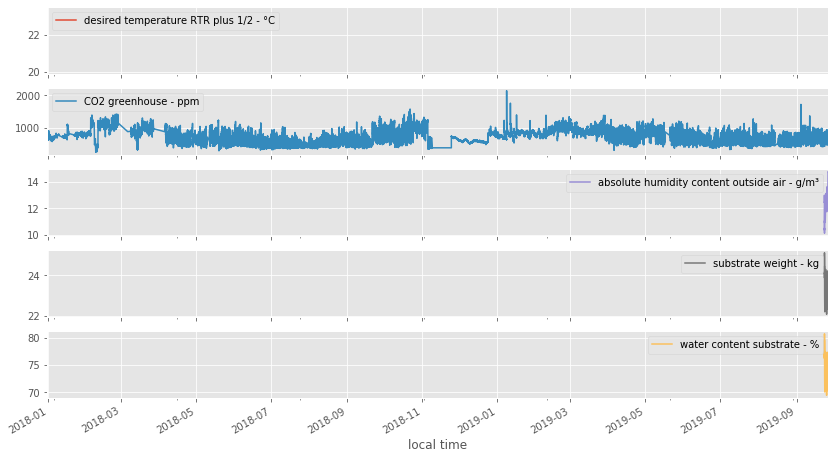

In [99]:
df.plot(subplots=True)
plt.show()

In [100]:
# The following shows the first and last valid dates per column
for col in df.columns:
    print('{: <50} {} {}'.format(col, str(df[col].first_valid_index()), str(df[col].last_valid_index())))

desired temperature RTR plus 1/2 - °C              2019-09-12 22:00:00 2019-09-25 22:00:00
CO2 greenhouse - ppm                               2017-12-31 00:00:00 2019-09-26 15:15:00
absolute humidity content outside air - g/m³       2019-09-23 14:35:00 2019-09-26 14:15:00
substrate weight - kg                              2019-09-23 15:45:00 2019-09-26 15:15:00
water content substrate - %                        2019-09-23 15:40:00 2019-09-26 15:15:00


### NANS, missing values

In [101]:
df.isna().astype(int).sum()

desired temperature RTR plus 1/2 - °C           170433
CO2 greenhouse - ppm                                 1
absolute humidity content outside air - g/m³    169586
substrate weight - kg                           169588
water content substrate - %                     169587
dtype: int64

In [102]:
round(df.isna().astype(int).mean() * 100, 2)

desired temperature RTR plus 1/2 - °C           99.99
CO2 greenhouse - ppm                             0.00
absolute humidity content outside air - g/m³    99.49
substrate weight - kg                           99.50
water content substrate - %                     99.50
dtype: float64

Summarizing, we have co2 data for one year and 9 months, and just some days for the rest. Let's start with the co2.

### CO2

In [150]:
df_co2 = df[['CO2 greenhouse - ppm']].resample('1d').agg(['mean', 'std', 'max', 'min'])
df_co2.columns = df_co2.columns.get_level_values(1)
df_co2.sample(10)

mean         std      max     min
local time                                         
2019-07-01  582.376007   94.303315   841.00  438.70
2019-05-23  722.665938  222.604393  1111.25  452.25
2019-08-19  546.756806   84.376604   735.90  422.10
2019-08-01  567.095243   80.921683   815.00  452.50
2018-09-26  860.898368  164.316853  1146.00  515.75
2019-05-31  728.936632  208.057316  1103.90  468.40
2018-07-19  488.817986   92.845634   706.33  361.33
2018-04-17  597.529444  139.540228  1033.20  426.68
2018-09-11  532.357604   86.405311   723.42  396.33
2018-06-16  536.185590  104.254617   774.90  387.65

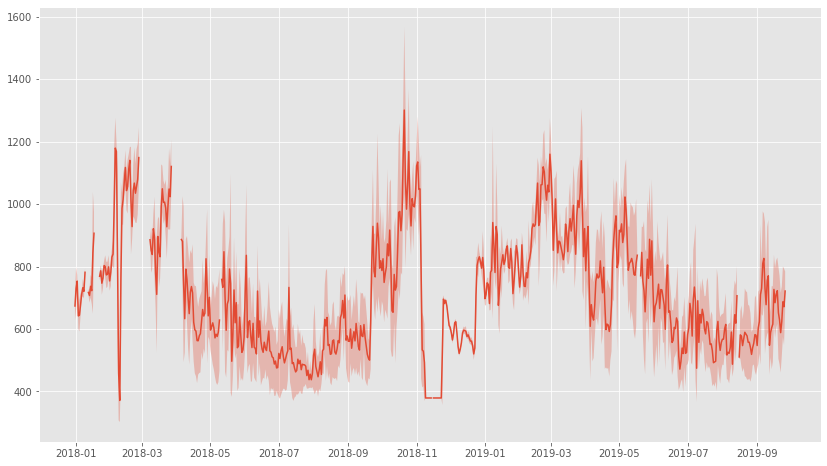

In [172]:
plt.plot(df_co2['mean'])
plt.fill_between(df_co2.index, df_co2['mean']-df_co2['std'], df_co2['mean']+df_co2['std'], alpha=0.3)

In [104]:
df_co2['year'] = [d.year for d in df_co2.index]
df_co2['month'] = [d.strftime('%b') for d in df_co2.index]

In [105]:
df_co2.year.value_counts(dropna=False)

2018    365
2019    269
2017      1
Name: year, dtype: int64

In [106]:
df_co2.month.value_counts(dropna=False)

May    62
Jan    62
Jul    62
Aug    62
Mar    62
Jun    60
Apr    60
Sep    56
Feb    56
Dec    32
Oct    31
Nov    30
Name: month, dtype: int64

In [107]:
tmp = df_co2.groupby(['year', 'month'], as_index=False)['mean'].mean()
tmp

year month        mean
0   2017   Dec  673.585903
1   2018   Apr  684.307155
2   2018   Aug  555.686948
3   2018   Dec  630.513396
4   2018   Feb  965.980687
5   2018   Jan  751.801630
6   2018   Jul  498.577938
7   2018   Jun  568.285262
8   2018   Mar  927.674151
9   2018   May  632.374907
10  2018   Nov  570.178945
11  2018   Oct  912.545095
12  2018   Sep  650.159984
13  2019   Apr  744.284282
14  2019   Aug  568.753529
15  2019   Feb  928.082634
16  2019   Jan  799.997972
17  2019   Jul  597.096368
18  2019   Jun  626.007317
19  2019   Mar  930.369531
20  2019   May  828.030365
21  2019   Sep  675.270424

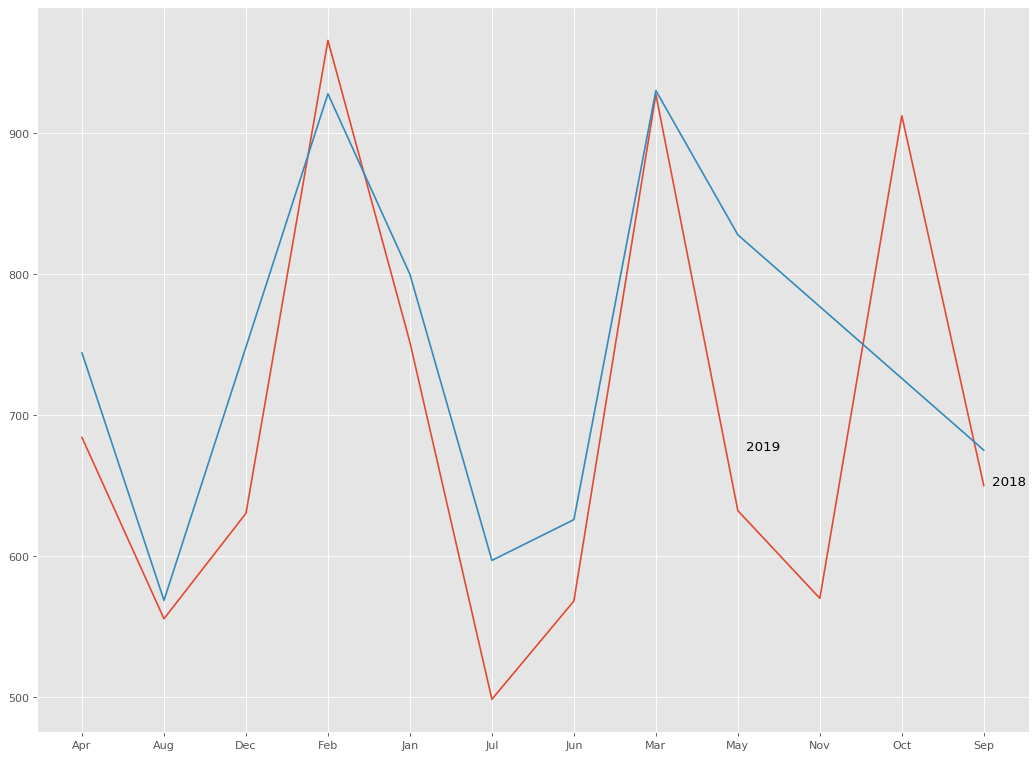

In [108]:
years = tmp.year.unique()

plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'mean', data=tmp.loc[tmp.year==y,], label=y)
        plt.text(tmp.loc[tmp.year==y,].shape[0]-.9, 
                 tmp.loc[tmp.year==y, 'mean'][-1:].values[0], y, fontsize=12)

A better way is to directly resample by month and properly order the months

Text(0.5, 1.0, 'Month-wise Box Plot\n(The Seasonality)')

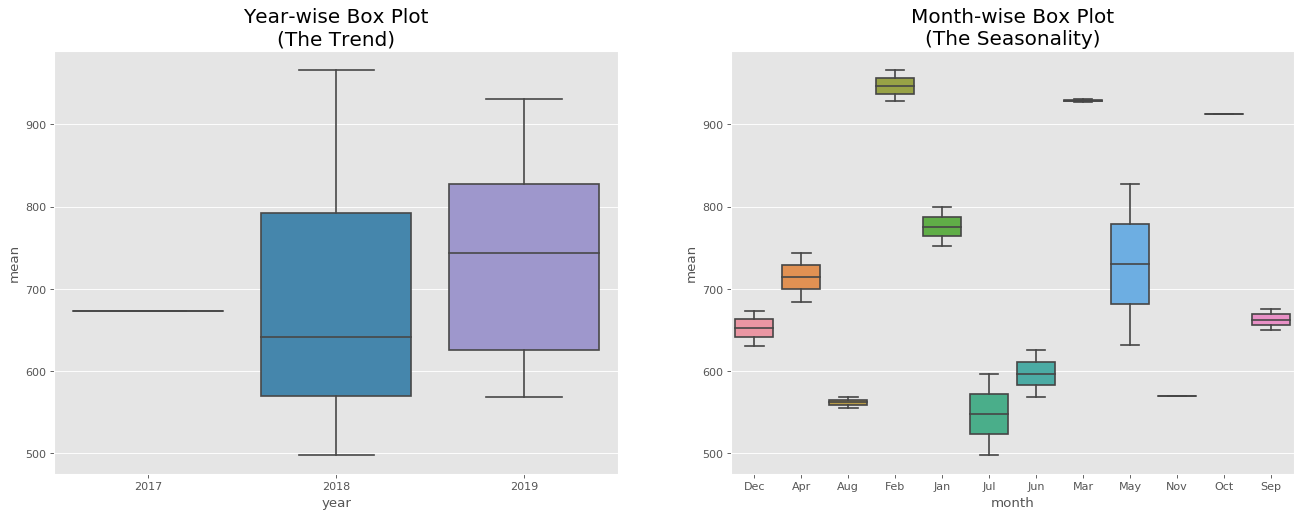

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='mean', data=tmp, ax=axes[0])
sns.boxplot(x='month', y='mean', data=tmp)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.interpolate import interp1d

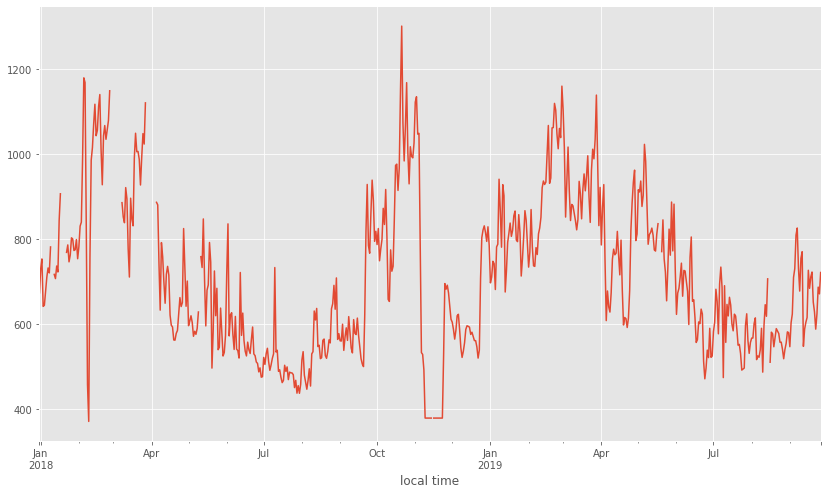

In [111]:
df_co2['mean'].plot()

Some missing values, we can use a simple linear interpolation to take care of that

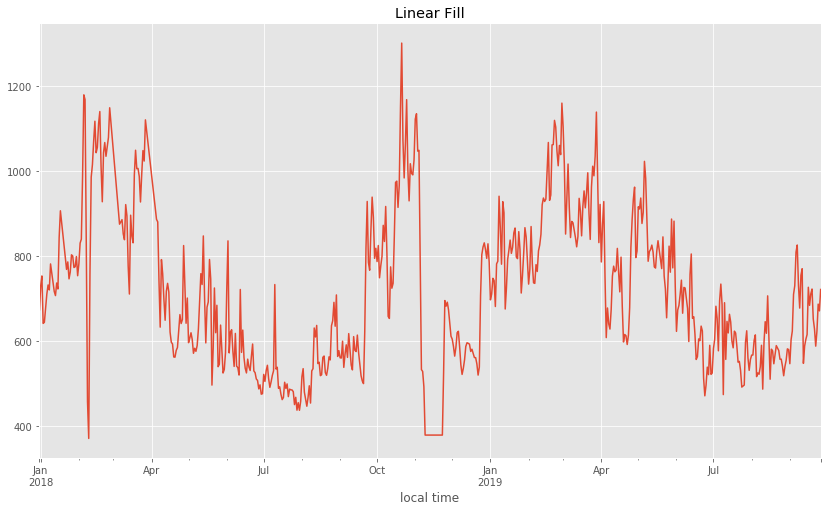

In [112]:
df_co2['rownum'] = np.arange(df_co2.shape[0])
df_co2_nona = df_co2.dropna(subset = ['mean'])
f = interp1d(df_co2_nona['rownum'], df_co2_nona['mean'])
df_co2['linear_fill'] = f(df_co2['rownum'])

df_co2['linear_fill'].plot(title="Linear Fill")

Let's have a look if we can decompose it

In [113]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_co2['linear_fill'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_co2['linear_fill'], model='additive', extrapolate_trend='freq')

# extrapolate_trend='freq' takes care of of any missing values 
# in the trend and residuals at the beginning of the series.

Text(0.5, 0.98, 'Additive Decompose')

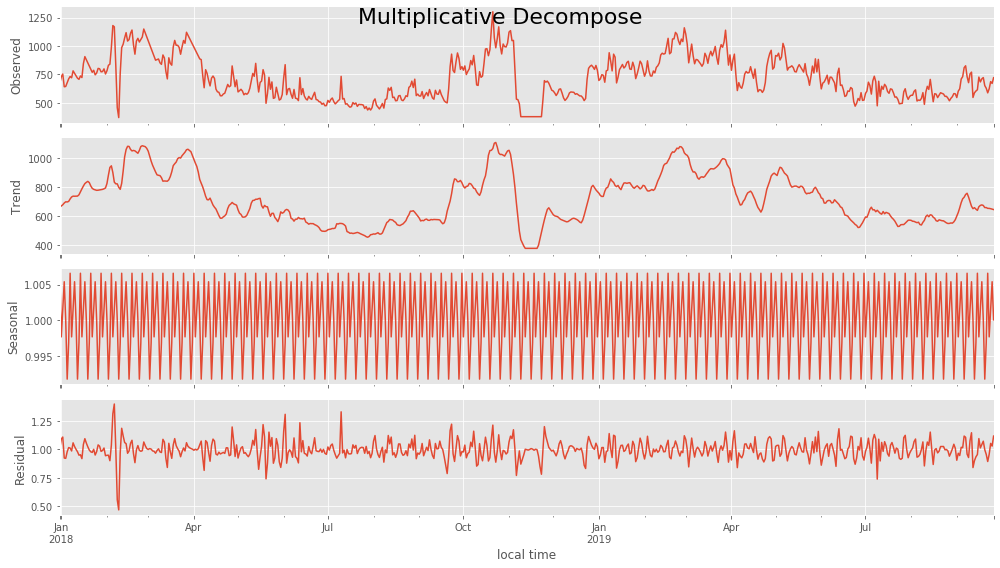

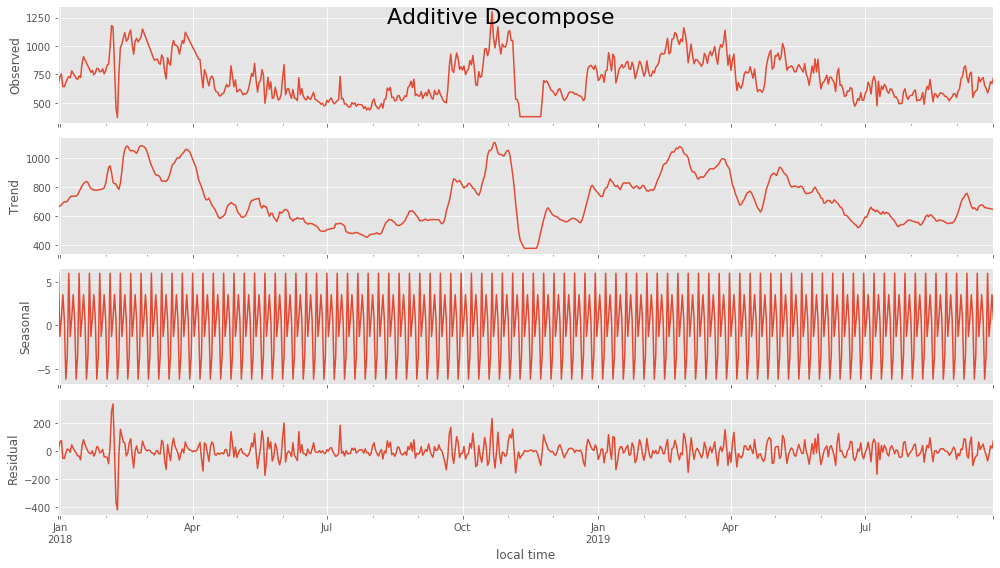

In [114]:
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)

There is clear seasonality on a small time scale to investigate further, but both decompositions have a fairly random residual, so they can be equally good.

We can detrend it

Text(0.5, 1.0, 'Detrended')

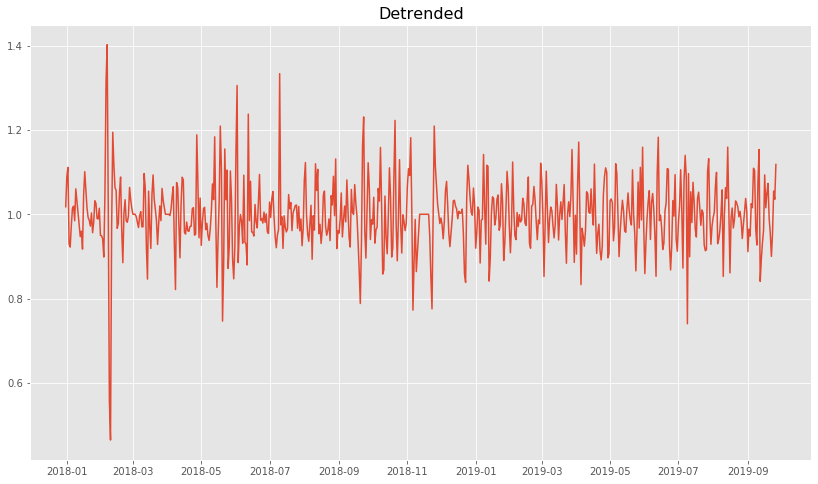

In [117]:
detrended = df_co2['linear_fill'].values / result_mul.trend
plt.plot(detrended)
plt.title('Detrended', fontsize=16)

Text(0.5, 1.0, 'Deseasonalized')

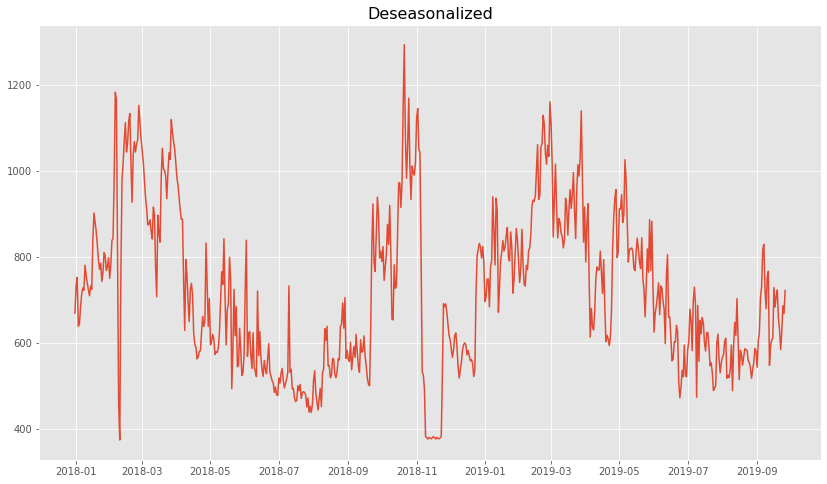

In [118]:
deseasonalized = df_co2['linear_fill'].values / result_mul.seasonal
plt.plot(deseasonalized)
plt.title('Deseasonalized', fontsize=16)

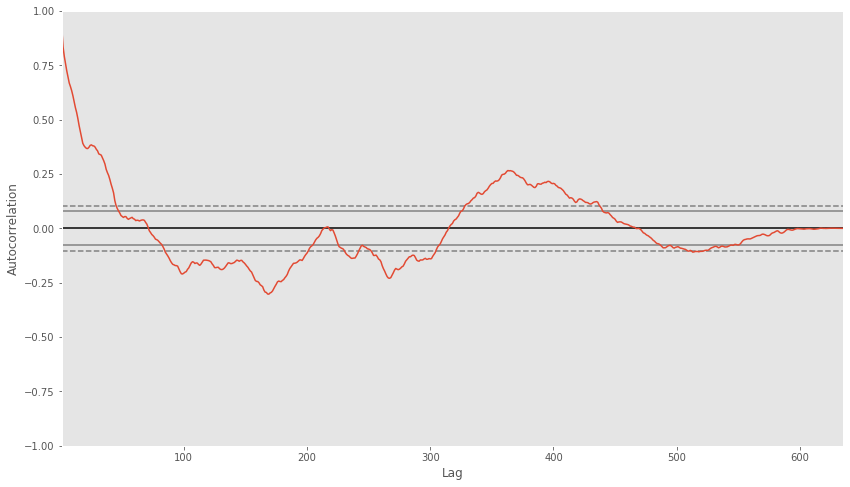

In [121]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_co2['linear_fill'].tolist())

Going back to a 1 hour resampling, we see some anomalies in the data

In [122]:
co2 = df['CO2 greenhouse - ppm'].resample('1h').mean()

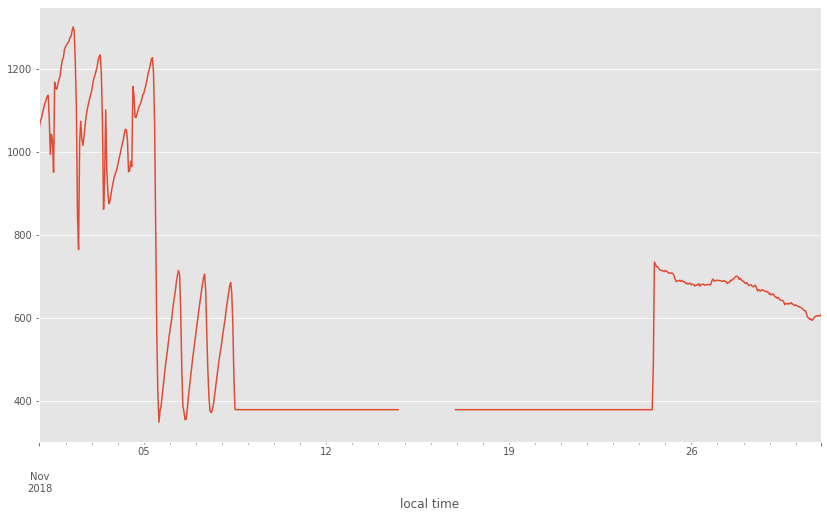

In [123]:
co2.loc['2018-11'].plot()

Not all values are trustworthy.

In [124]:
co2.loc['2018-11-12':'2018-11-15']

local time
2018-11-12 00:00:00    379.0
2018-11-12 01:00:00    379.0
2018-11-12 02:00:00    379.0
2018-11-12 03:00:00    379.0
2018-11-12 04:00:00    379.0
                       ...  
2018-11-15 19:00:00      NaN
2018-11-15 20:00:00      NaN
2018-11-15 21:00:00      NaN
2018-11-15 22:00:00      NaN
2018-11-15 23:00:00      NaN
Freq: H, Name: CO2 greenhouse - ppm, Length: 96, dtype: float64

We can try to implement a method to spot these windows automatically

In [135]:
df_co2 = df[['CO2 greenhouse - ppm']].resample('1h').mean().reset_index()

# get a variable that changes by 1 every time the value changes
df_co2['value_grp'] = (df_co2['CO2 greenhouse - ppm'].diff(1) != 0).astype('int').cumsum()

consecutives = pd.DataFrame({'BeginDate' : df_co2.groupby('value_grp')['local time'].first(), 
                            'EndDate' : df_co2.groupby('value_grp')['local time'].last(),
                            'Consecutive' : df_co2.groupby('value_grp').size()}).reset_index(drop=True)

consecutives[consecutives.Consecutive != 1]

BeginDate             EndDate  Consecutive
7501 2018-11-08 13:00:00 2018-11-14 18:00:00          150
7554 2018-11-16 23:00:00 2018-11-24 12:00:00          182

The FFT shows some interesting periodic behavior:

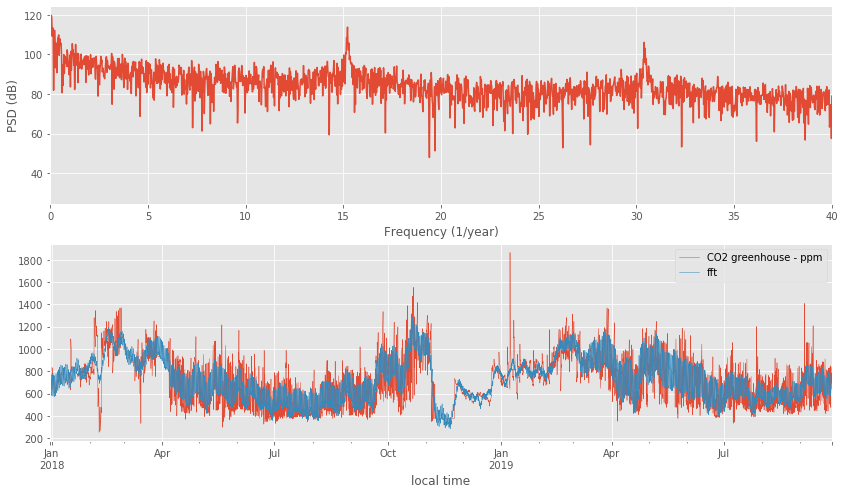

In [58]:
bluedragonfly.plotting.plot_fft(co2.interpolate())

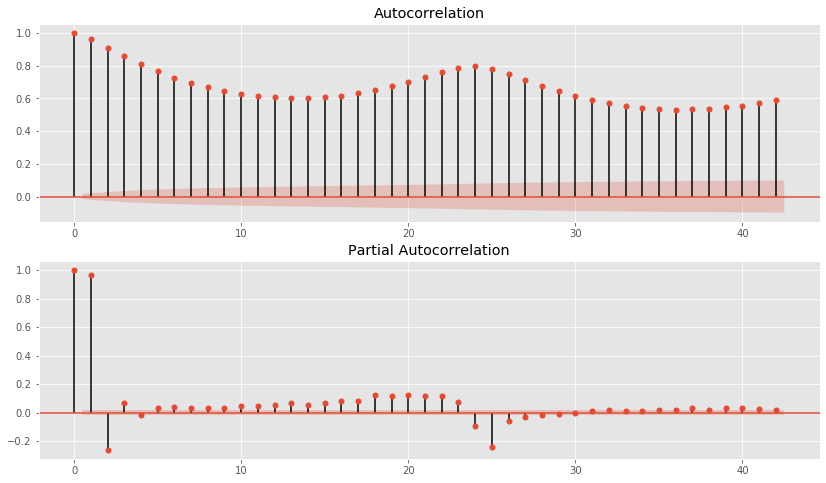

In [59]:
bluedragonfly.plotting.plot_acf_pacf(co2.interpolate())

(To be continued)

# Relationships between sources

This is tricky as we only have a day or 2 with information about every sensor.

In [139]:
cleaned = df[[col for col in df.columns if 'temper' not in col]].dropna(axis=0)

cleaned.head()

CO2 greenhouse - ppm  \
local time                                  
2019-09-23 15:45:00                560.35   
2019-09-23 15:50:00                553.65   
2019-09-23 15:55:00                546.15   
2019-09-23 16:00:00                562.85   
2019-09-23 16:05:00                553.05   

                     absolute humidity content outside air - g/m³  \
local time                                                          
2019-09-23 15:45:00                                      11.05138   
2019-09-23 15:50:00                                      10.73147   
2019-09-23 15:55:00                                      10.84621   
2019-09-23 16:00:00                                      10.87390   
2019-09-23 16:05:00                                      10.81548   

                     substrate weight - kg  water content substrate - %  
local time                                                               
2019-09-23 15:45:00                 24.408                        78.32  
2019-09-23 15:50:00                 24.356                        78.29  
2019-09-23 15:55:00                 24.282                        77.70  
2019-09-23 16:00:00                 24.368                        77.61  
2019-09-23 16:05:00                 24.709                        79.31

In [144]:
cleaned.corr()

CO2 greenhouse - ppm  \
CO2 greenhouse - ppm                                      1.000000   
absolute humidity content outside air - g/m³             -0.016900   
substrate weight - kg                                     0.083410   
water content substrate - %                               0.083547   

                                              absolute humidity content outside air - g/m³  \
CO2 greenhouse - ppm                                                             -0.016900   
absolute humidity content outside air - g/m³                                      1.000000   
substrate weight - kg                                                            -0.109543   
water content substrate - %                                                      -0.112731   

                                              substrate weight - kg  \
CO2 greenhouse - ppm                                       0.083410   
absolute humidity content outside air - g/m³              -0.109543   
substrate weight - kg                                      1.000000   
water content substrate - %                                0.997865   

                                              water content substrate - %  
CO2 greenhouse - ppm                                             0.083547  
absolute humidity content outside air - g/m³                    -0.112731  
substrate weight - kg                                            0.997865  
water content substrate - %                                      1.000000

And I don't know anything about plants but that correlation makes sense.

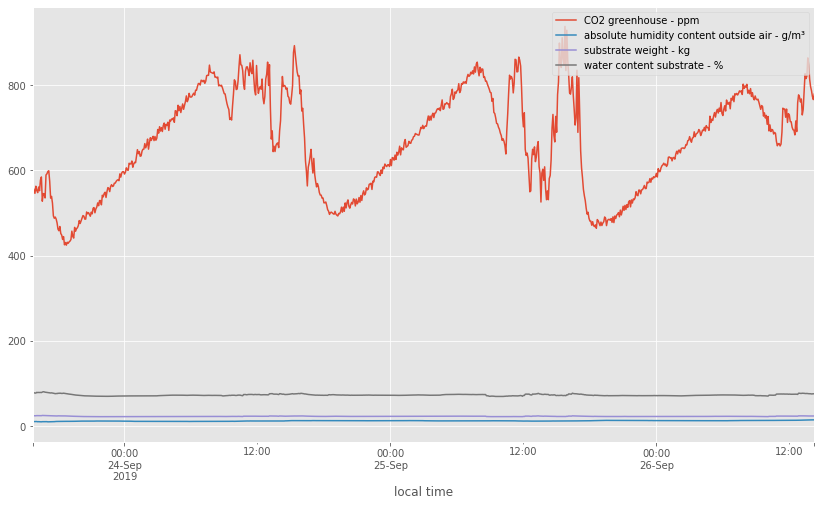

In [145]:
cleaned.plot()

Indeed a nice daily seasonality.

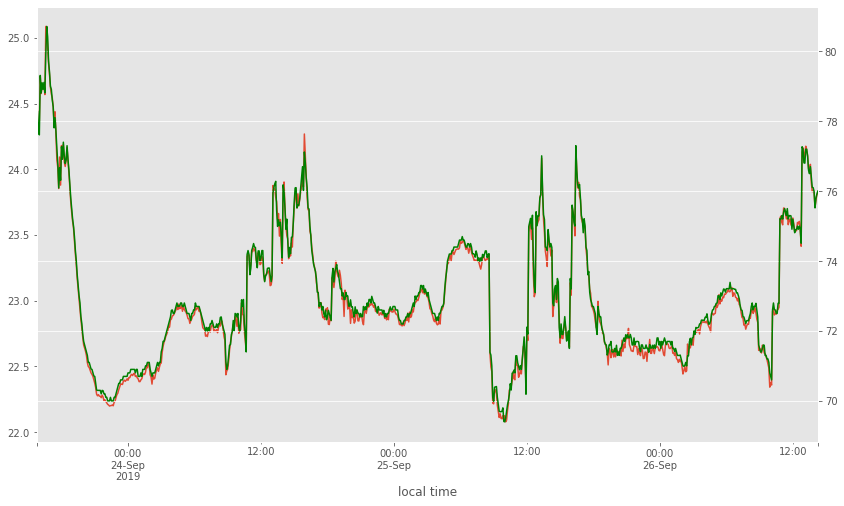

In [146]:
cleaned['substrate weight - kg'].plot()
cleaned['water content substrate - %'].plot(secondary_y=True, style='g')

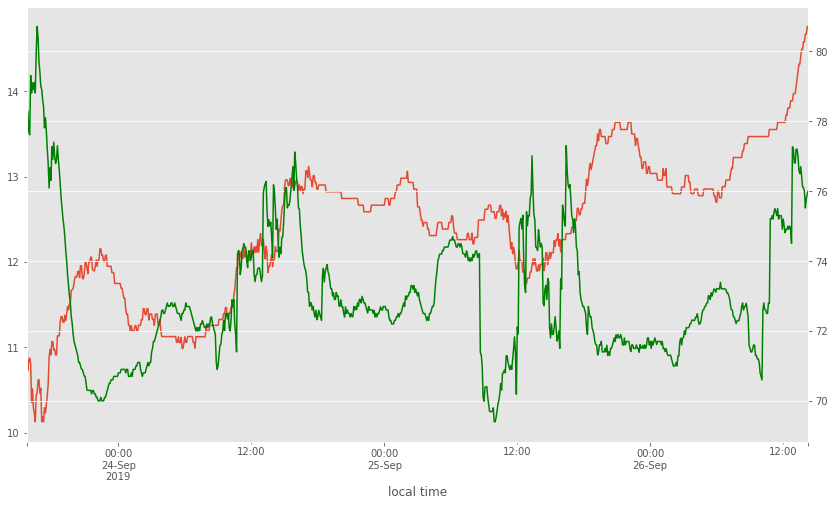

In [148]:
cleaned['absolute humidity content outside air - g/m³'].plot()
cleaned['water content substrate - %'].plot(secondary_y=True, style='g')

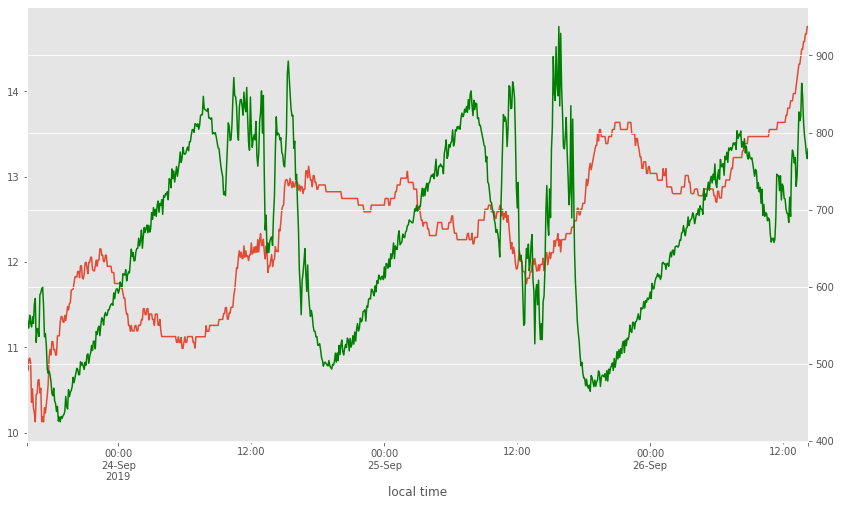

In [149]:
cleaned['absolute humidity content outside air - g/m³'].plot()
cleaned['CO2 greenhouse - ppm'].plot(secondary_y=True, style='g')